# BPP Customer Churn Model

This code creates a churn model to understand the retention rate of customers. There are two data sources that have been used, the first being a PDF file containing customer data and the second being a live xlsx file.

The code is split into 4 sections:

1.   Data Load
2.   Data Cleanse
3.   Exploratory Data Analysis (EDA)
4.   Modelling
5.   Findings and Recommendations
6.   References

A function has been created (Churn) that takes in applicant attributes and outputs the whether they will churn or not.

Created: August 2023

**Student Number: BP0279765**

## 1. Data Load

In [1]:
# Install Tabula

!python -m pip install tabula-py

### Import Libraries

In [2]:
#Load required libraries   
#Data processing, Excel file (e.g. pd.read_excel)
import pandas as pd
import numpy as np

#Load PDF data
from tabula import read_pdf 

#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Changing directory
import os

#Modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

As the data files are two different types of files, the read_excel pandas function will convert the xlsx file into a dataframe and the library read_pdf has been installed from tabula to convert the pdf directly to a dataframe.

### Read XLSX file

In [3]:
#Create the dataframe from excel
bpp_churn_xlsx = pd.read_excel('bpp_churn_data.xlsx')

In [4]:
#Check length
print ('bpp_churn_data.xlsx contains', len(bpp_churn_xlsx), 'rows')

bpp_churn_data.xlsx contains 4900 rows


In [5]:
#Check the data 
bpp_churn_xlsx.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4374-YMUSQ,Male,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),116.25,3899.05,No
1,4513-CXYIX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Credit card (automatic),80.70,5676,No
2,3957-HHLMR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,No,Yes,One year,No,Bank transfer (automatic),65.20,4543.15,No
3,7803-XOCCZ,Female,0,Yes,Yes,52,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),84.05,4326.8,No
4,5736-YEJAX,Male,0,No,Yes,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.45,5502.55,No


### Read PDF

In [6]:
#Create the dataframe from pdf

bpp_churn_pdf = pd.DataFrame(read_pdf('bpp_churn_data.pdf', lattice=True, relative_area= True, multiple_tables= False, pages='all')[0])

In [7]:
#Check length
print ('bpp_churn_data.pdf contains', len(bpp_churn_pdf), 'rows')

bpp_churn_data.pdf contains 1643 rows


Viewing bpp_customer_churn_data

In [8]:
#Check the pdf data

bpp_churn_pdf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.40,2406.10,No
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,638.55,No
2,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,191.10,No
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),95.65,4664.20,No


### Check Shape of Dataframes

In [9]:
#Checking the shape by looking at the number of rows/columns
print('The shape of the xlsx file is (rows, columns):', bpp_churn_xlsx.shape)
print('The shape of the pdf file is (rows, columns):', bpp_churn_pdf.shape)

The shape of the xlsx file is (rows, columns): (4900, 21)
The shape of the pdf file is (rows, columns): (1643, 21)


### Merge Datasets

In [10]:
#Create an array with both the dataframes as they contain the same number of columns/the same data in each column
frames = [bpp_churn_pdf,bpp_churn_xlsx]

#Use concat to join bpp_churn_xlsx to the bottom of bpp_churn_pdf
bpp_df = pd.concat(frames)

In [11]:
#Check shape of dataframe to make sure that this is what we expected after the concat
bpp_df.shape

(6543, 21)

## 2. Data Cleanse

* Check for missing values
* Check data types
* Check for and analyse duplicates
* Remove Duplicates
* Correct erronious values
* Remove erronious data
* Encode data

#### Missing Values

In [12]:
#View any cell in the dataframe with a NaN value
bpp_df[bpp_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1270,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
1354,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [13]:
#Check for any rows with empty spaces
bpp_df.query("TotalCharges == ' '")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
253,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
436,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
582,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
840,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3326,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3880,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4718,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [14]:
#Replace the empty space with 0
bpp_df['TotalCharges'] = bpp_df['TotalCharges'].replace(' ', 0)

In [15]:
#Replace the NaN values in TotalCharges with 0 so there will be an integer in the cell
bpp_df['TotalCharges'] = bpp_df['TotalCharges'].fillna(0)

In [16]:
#Check to see if replace worked
bpp_df.query("TotalCharges == ' '")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
#Check to see if fillna worked
bpp_df[bpp_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Duplicates

In [18]:
#Create a pivot and the length will show if there are any duplicates if it does not match the original 6543
dups_bpp_df = bpp_df.pivot_table(columns=['customerID'], aggfunc='size')
print (dups_bpp_df)

customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Length: 6543, dtype: int64


#### Data Types

TotalCharges are also stored as text so, will need converting to float.

In [19]:
#Convert the column from object to float
bpp_df['TotalCharges'] = bpp_df['TotalCharges'].astype(float)

In [20]:
#Confirm the data type
bpp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 4899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6543 non-null   object 
 1   gender            6543 non-null   object 
 2   SeniorCitizen     6543 non-null   int64  
 3   Partner           6543 non-null   object 
 4   Dependents        6543 non-null   object 
 5   tenure            6543 non-null   int64  
 6   PhoneService      6543 non-null   object 
 7   MultipleLines     6543 non-null   object 
 8   InternetService   6543 non-null   object 
 9   OnlineSecurity    6543 non-null   object 
 10  OnlineBackup      6543 non-null   object 
 11  DeviceProtection  6543 non-null   object 
 12  TechSupport       6543 non-null   object 
 13  StreamingTV       6543 non-null   object 
 14  StreamingMovies   6543 non-null   object 
 15  Contract          6543 non-null   object 
 16  PaperlessBilling  6543 non-null   object 


### Outliers

Text(0, 0.5, 'Frequency')

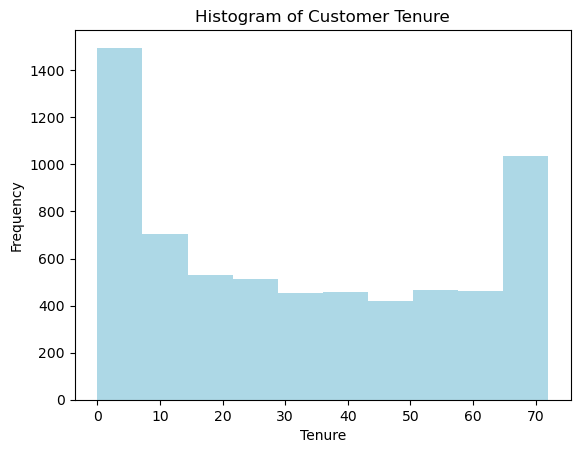

In [21]:
# Create a Histogram using mattplotlib to understand the distribution on tenure                
plt.hist(bpp_df['tenure'], color='lightblue', bins=10)

# Set the chart title and axis labels
plt.title('Histogram of Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

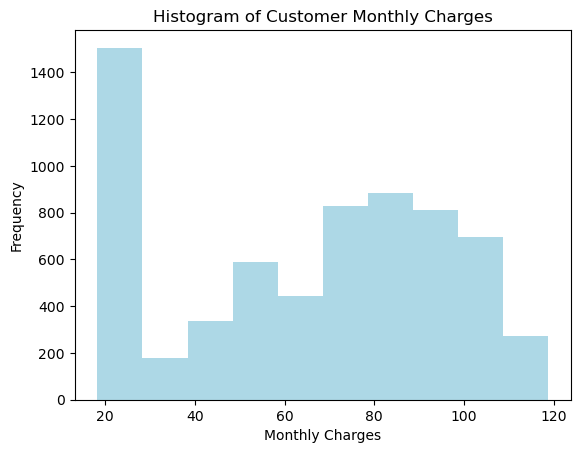

In [22]:
# Create a Histogram using mattplotlib to understand the distribution on MonthlyCharges    
plt.hist(bpp_df['MonthlyCharges'], color='lightblue', bins=10)

# Set the chart title and axis labels
plt.title('Histogram of Customer Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency');

Text(0, 0.5, 'Frequency')

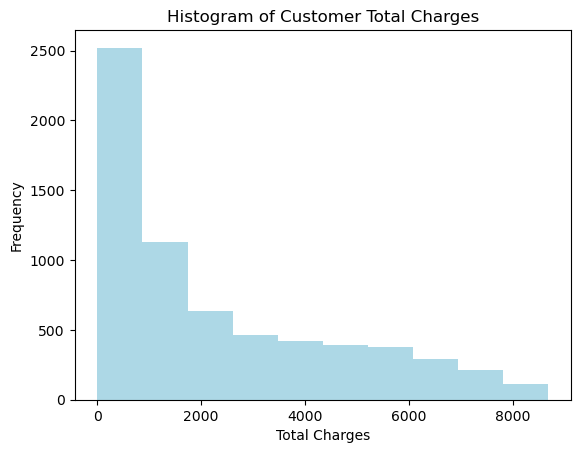

In [23]:
# Create a Histogram using mattplotlib to understand the distribution on TotalCharges          
plt.hist(bpp_df['TotalCharges'], color='lightblue', bins=10)

# Set the chart title and axis labels
plt.title('Histogram of Customer Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

In [24]:
# Define dataframe containing only MonthlyCharges and TotalCharges

charges = bpp_df[['MonthlyCharges','TotalCharges', 'tenure']]

charges.shape

(6543, 3)

Text(0.5, 0, 'Frequency')

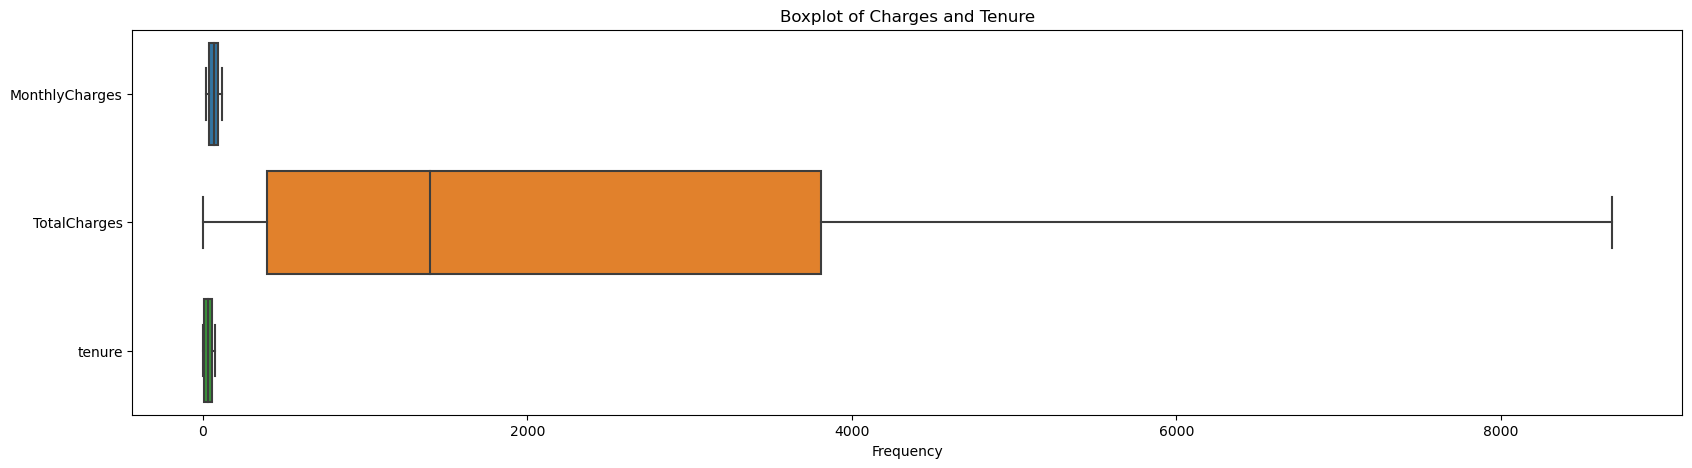

In [25]:
# Create boxplot using Seaborn library to understand outliers MonthlyCharges and TotalCharges
# Create the plot canvas and set the size
plt.figure(figsize=(20,5))

# Create the box plot using the ApIncome data and use horizontal rotation 
sns.boxplot(data=charges, orient='h')

# Set the chart axis labels and title
plt.title("Boxplot of Charges and Tenure")
plt.xlabel('Frequency')

The above plots show that there are no outliers and so, all the data will be included in the model.

### Labelling

#### No internet Service

The following columns have the three options Yes, No, No internet service:

OnlineSecurity,	OnlineBackup, DeviceProtection,	TechSupport, StreamingTV, StreamingMovies

As there is an InternetService column, I will change No internet service to No as they are the same outcome.

In [26]:
#see how many unique options are available usine OnlineBackup as a sense check
bpp_df['OnlineBackup'].describe()

count     6543
unique       3
top         No
freq      2876
Name: OnlineBackup, dtype: object

In [27]:
#replacing 'No internet service' with 'No'
bpp_df['OnlineSecurity'] = bpp_df['OnlineSecurity'] .replace('No internet service', 'No') 
bpp_df['OnlineBackup'] = bpp_df['OnlineBackup'] .replace('No internet service', 'No') 
bpp_df['DeviceProtection'] = bpp_df['DeviceProtection'] .replace('No internet service', 'No') 
bpp_df['TechSupport'] = bpp_df['TechSupport'] .replace('No internet service', 'No') 
bpp_df['StreamingTV'] = bpp_df['StreamingTV'] .replace('No internet service', 'No') 
bpp_df['StreamingMovies'] = bpp_df['StreamingMovies'] .replace('No internet service', 'No') 

#### PaymentMethod

The column has options with different formats so, changing them to exclude the '(automatic)' part of the string.

In [28]:
bpp_df['PaymentMethod'].unique()

array(['Bank transfer (automatic)', 'Mailed check', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

In [29]:
# to ensure no special characters are used and format of string is the same
bpp_df['PaymentMethod'] = bpp_df['PaymentMethod'].replace('Bank transfer (automatic)', 'Bank transfer')
bpp_df['PaymentMethod'] = bpp_df['PaymentMethod'].replace('Credit card (automatic)', 'Credit card')

### Encoding Categorical Data

The following code will encode the data for modelling but for EDA the non-encoded data will be used because we are exploring the data set.

In [30]:
encoded_df = bpp_df.copy()
features = list(encoded_df)
le = LabelEncoder()
for i in features:
    encoded_df[i] = le.fit_transform(encoded_df[i])

# 3. EDA

In this section the following will be covered:
* Overview of Dataset
* Overview of the Customer Specific Personal Attribute
* Deep Dive into the Services Used 
* The correlation of the features
* Ethical concerns around the dataset

### Overview of Dataset

In [31]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 4899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        6543 non-null   int32
 1   gender            6543 non-null   int32
 2   SeniorCitizen     6543 non-null   int64
 3   Partner           6543 non-null   int32
 4   Dependents        6543 non-null   int32
 5   tenure            6543 non-null   int64
 6   PhoneService      6543 non-null   int32
 7   MultipleLines     6543 non-null   int32
 8   InternetService   6543 non-null   int32
 9   OnlineSecurity    6543 non-null   int32
 10  OnlineBackup      6543 non-null   int32
 11  DeviceProtection  6543 non-null   int32
 12  TechSupport       6543 non-null   int32
 13  StreamingTV       6543 non-null   int32
 14  StreamingMovies   6543 non-null   int32
 15  Contract          6543 non-null   int32
 16  PaperlessBilling  6543 non-null   int32
 17  PaymentMethod     6543 non-null  

In [32]:
encoded_df.describe().round(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,...,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00,6543.00
mean,3271.00,0.51,0.16,0.48,0.30,32.44,0.90,0.94,0.88,0.29,...,0.34,0.29,0.38,0.39,0.69,0.59,1.58,672.15,2895.84,0.27
std,1888.95,0.50,0.37,0.50,0.46,24.57,0.29,0.95,0.74,0.45,...,0.48,0.45,0.49,0.49,0.83,0.49,1.07,471.76,1811.41,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1635.50,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,192.50,1293.50,0.00
50%,3271.00,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,2.00,709.00,2861.00,0.00
75%,4906.50,1.00,0.00,1.00,1.00,56.00,1.00,2.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1073.00,4464.50,1.00
max,6542.00,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,1.00,...,1.00,1.00,1.00,1.00,2.00,1.00,3.00,1559.00,6089.00,1.00


### Overview of Personal Attributes

##### View of all columns relating to the customer and if they are close in number will they really make an effect. So should they be included in the model.

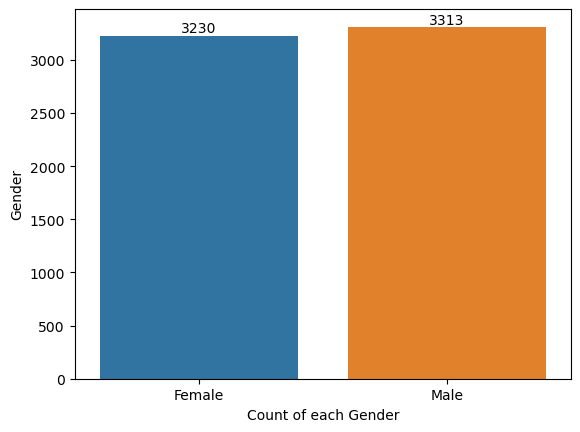

In [33]:
ax = sns.countplot(x='gender' ,data=bpp_df)
plt.xlabel("Count of each Gender")
plt.ylabel("Gender")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

this doesnt give me an answer so i will go into the churn rate

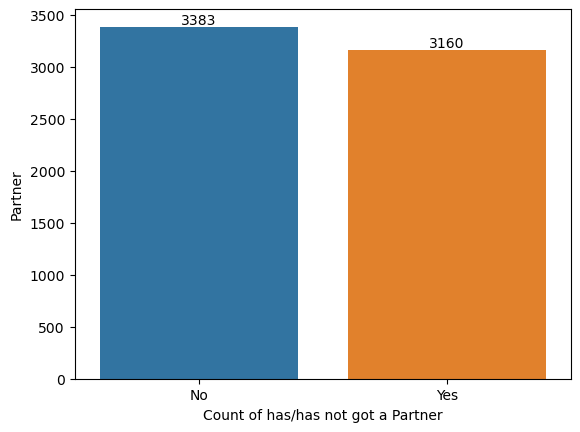

In [34]:
ax = sns.countplot(x='Partner' ,data=bpp_df)
plt.xlabel("Count of has/has not got a Partner")
plt.ylabel("Partner")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

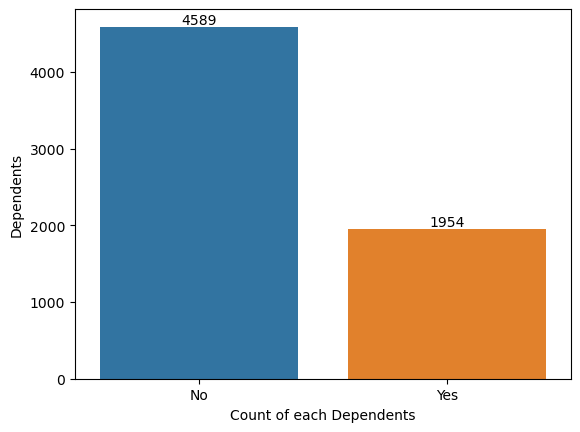

In [35]:
ax = sns.countplot(x='Dependents' ,data=bpp_df)
plt.xlabel("Count of each Dependents")
plt.ylabel("Dependents")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

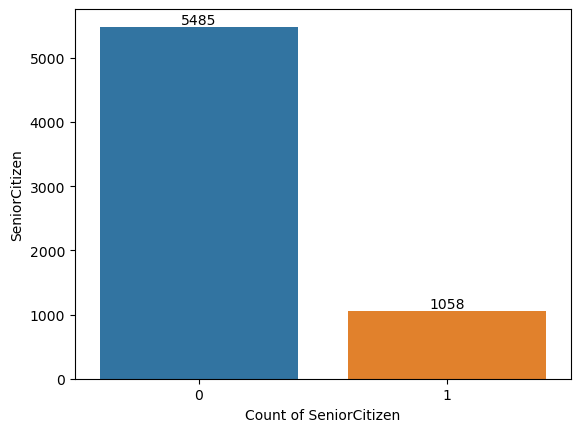

In [36]:
ax = sns.countplot(x='SeniorCitizen' ,data=bpp_df)
plt.xlabel("Count of SeniorCitizen")
plt.ylabel("SeniorCitizen")

ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

### Looking at the Services Used

The churn rate formula is: (Lost Customers(Churn = Yes) ÷ Total Customers) x 100. 

#### Subsets of Yes/No Churn

In [37]:
#create the subsets for yes churn and no churn 
yes_churn = bpp_df.query("Churn == 'Yes'")
no_churn = bpp_df.query("Churn == 'No'")

In [38]:
yes_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9,6005-OBZPH,Female,1,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.15,2277.65,Yes
11,7932-WPTDS,Female,1,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes


In [39]:
no_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer,70.40,2406.10,No
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.45,638.55,No


#### 1.	Senior Citizens and Churn

In [40]:
#Determine the percentage of senior citizens that churn compared to the overall customer base. 
#Create a subset with only Senior Citizens
senior_citizens = bpp_df.query("SeniorCitizen == 1")
citizens = bpp_df.query("SeniorCitizen == 0")

In [41]:
#Create a dataframe with the Churn data 
df = pd.DataFrame(senior_citizens['Churn'].value_counts())
#Calculate the churn rate
df['churn_rate'] = ((df['Churn']/1058)*100).round(2)
df

,Churn,churn_rate
No,612,57.84
Yes,446,42.16


In [42]:
#Create a dataframe with the citizen Churn data 
citizens_df = pd.DataFrame(citizens['Churn'].value_counts())
#Calculate the churn rate
citizens_df['churn_rate'] = ((citizens_df['Churn']/5485)*100).round(2)
citizens_df

,Churn,churn_rate
No,4190,76.39
Yes,1295,23.61


In [43]:
#overall churn rate 
#Create a dataframe with the citizen Churn data 
df = pd.DataFrame(bpp_df['Churn'].value_counts())
#Calculate the churn rate
df['Churn_Rate'] = ((df['Churn']/6543)*100).round(2)
df


,Churn,Churn_Rate
No,4802,73.39
Yes,1741,26.61


Churn Rate for Senior Citizens is 42.16% where for Non Senior Citizens is 23.61% and overall the churn rate is 26.61%

#### 2.	Tenure and Churn

In [44]:
#Determine the percentage of tenure that churn compared to the overall customer base. 
#Create a subset with only tenure
tenure = bpp_df.query("tenure != 0")
no_tenure = bpp_df.query("tenure == 0")

In [45]:
#Create a dataframe with the customers with tenure  data 
tenure_df = pd.DataFrame(tenure['Churn'].value_counts())
#Calculate the churn rate
tenure_df['churn_rate'] = ((tenure_df['Churn']/6533)*100).round(2)
tenure_df

,Churn,churn_rate
No,4792,73.35
Yes,1741,26.65


In [46]:
#Calculate the mean tenure of those who churn
yes_churn.mean().round(2)

SeniorCitizen        0.26
tenure              18.15
MonthlyCharges      74.59
TotalCharges      1552.50
dtype: float64

In [47]:
#Calculate the mean of those who do not churn
no_churn.mean().round(2)

SeniorCitizen        0.13
tenure              37.62
MonthlyCharges      61.07
TotalCharges      2549.72
dtype: float64

In [48]:
bpp_df['tenure'].mean().round(2)

32.44

For those that Churn the average tenure is 18.15, where those who do not Churn it is 37.62. Overall the average Tenure is 32.44. The Tenure Churn rate is 26.65%.

#### 3.	Internet Service and Churn

In [49]:
yes_churn_internet = pd.DataFrame(yes_churn['InternetService'].value_counts())
yes_churn_internet['percentage'] = ((yes_churn_internet['InternetService']/1741)*100).round(2)
yes_churn_internet

,InternetService,percentage
Fiber optic,1211,69.56
DSL,424,24.35
No,106,6.09


In [50]:
no_churn_internet = pd.DataFrame(no_churn['InternetService'].value_counts())
no_churn_internet['percentage'] = ((no_churn_internet['InternetService']/6543)*100).round(2)
no_churn_internet

,InternetService,percentage
DSL,1820,27.82
Fiber optic,1658,25.34
No,1324,20.24


In [51]:
#Determine the percentage of internet service that churn compared to the overall customer base. 
#Create a subset with only tenure
InternetService = bpp_df.query("InternetService != 'No'")

#Create a dataframe with the customers with tenure  data 
InternetService_df = pd.DataFrame(InternetService['Churn'].value_counts())
#Calculate the churn rate
InternetService_df['churn_rate'] = ((InternetService_df['Churn']/5113)*100).round(2)
InternetService_df

,Churn,churn_rate
No,3478,68.02
Yes,1635,31.98


##### DSL

In [52]:
#Determine the percentage of DSL that churn compared to the overall customer base. 
#Create a subset with only tenure
DSL = bpp_df.query("InternetService == 'DSL'")
DSL
#Create a dataframe with the customers with tenure  data 
DSL_df = pd.DataFrame(DSL['Churn'].value_counts())
#Calculate the churn rate
DSL_df['churn_rate'] = ((DSL_df['Churn']/2244)*100).round(2)
DSL_df

,Churn,churn_rate
No,1820,81.11
Yes,424,18.89


##### Fiber optic

In [53]:
#Determine the percentage of internet service that churn compared to the overall customer base. 
#Create a subset with only tenure
FO = bpp_df.query("InternetService == 'Fiber optic'")
FO

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer,70.40,2406.10,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
5,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.80,No
6,9715-WZCLW,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20,6910.30,No
9,6005-OBZPH,Female,1,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.15,2277.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
4893,5376-DEQCP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.60,70.60,Yes
4894,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card,105.10,5083.55,No
4895,9095-HFAFX,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card,81.00,389.60,Yes


In [54]:
#Create a dataframe with the customers with Fiber optic data 
FO_df = pd.DataFrame(FO['Churn'].value_counts())
#Calculate the churn rate
FO_df['churn_rate'] = ((FO_df['Churn']/2869)*100).round(2)
FO_df

,Churn,churn_rate
No,1658,57.79
Yes,1211,42.21


##### No Internet Service

In [55]:
#Determine the percentage of internet service that churn compared to the overall customer base. 
#Create a subset with only tenure
NoInternetService = bpp_df.query("InternetService == 'No'")
NoInternetService

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.45,638.55,No
2,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.35,191.10,No
8,6407-GSJNL,Female,0,No,No,51,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Bank transfer,24.95,1288.00,No
21,2300-RQGOI,Female,0,No,No,38,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.05,741.50,No
31,5995-WWKKG,Female,0,No,No,37,Yes,No,No,No,...,No,No,No,No,One year,Yes,Electronic check,19.80,695.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,9229-RQABD,Male,0,No,No,18,Yes,Yes,No,No,...,No,No,No,No,One year,No,Mailed check,23.75,424.50,No
4888,5515-IDEJJ,Male,0,Yes,Yes,1,Yes,No,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,19.90,19.90,Yes
4896,5627-TVBPP,Female,0,No,Yes,35,Yes,No,No,No,...,No,No,No,No,One year,Yes,Credit card,20.10,644.50,No
4898,3936-QQFLL,Male,0,No,No,2,Yes,No,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,19.75,39.30,No


In [56]:
#Create a dataframe with the customers with tenure  data 
NoInternetService_df = pd.DataFrame(NoInternetService['Churn'].value_counts())
#Calculate the churn rate
NoInternetService_df['churn_rate'] = ((NoInternetService_df['Churn']/1430 )*100).round(2)
NoInternetService_df

,Churn,churn_rate
No,1324,92.59
Yes,106,7.41


Internet Services have a churn of 31.98% where 18.51% of customers who Churn have Fiber Optic is significantly higher to the other internet services. The churn for customers with Fiber optics is 42.21% which higher than the overall churn.

#### 4.	Additional Services and Churn

##### OnlineSecurity

In [57]:
#Determine the percentage of OnlineSecurity that churn compared to the overall customer base. 
#Create a subset with only tenure
OnlineSecurity = bpp_df.query("OnlineSecurity != 'No'")
OnlineSecurity

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
5,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.80,No
6,9715-WZCLW,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20,6910.30,No
7,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,No
10,4049-ZPALD,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer,99.00,6375.80,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,9227-YBAXE,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer,82.50,5215.10,No
4871,0877-SDMBN,Female,0,No,No,54,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer,103.95,5639.05,Yes
4878,5320-BRKGK,Female,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,75.80,4415.75,No
4879,6284-KMNUF,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.00,5270.60,No


In [58]:
#Create a dataframe with the customers with OnlineSecurity data 
OnlineSecurity_df = pd.DataFrame(OnlineSecurity['Churn'].value_counts())
#Calculate the churn rate
OnlineSecurity_df['churn_rate'] = ((OnlineSecurity_df['Churn']/1876)*100).round(2)
OnlineSecurity_df

,Churn,churn_rate
No,1601,85.34
Yes,275,14.66


##### OnlineBackup

In [59]:
#Determine the percentage of OnlineBackup that churn compared to the overall customer base. 
#Create a subset with only OnlineBackup
OnlineBackup = bpp_df.query("OnlineBackup != 'No'")
OnlineBackup

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
5,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.80,No
7,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,No
9,6005-OBZPH,Female,1,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.15,2277.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,4043-MKDTV,Male,0,Yes,No,71,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.25,7291.75,No
4882,6229-UOLQL,Male,0,Yes,Yes,56,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,52.00,2884.90,No
4892,2162-FRZAA,Male,0,Yes,Yes,63,No,No phone service,DSL,No,...,Yes,Yes,No,No,Two year,No,Bank transfer,39.35,2395.05,No
4894,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card,105.10,5083.55,No


In [60]:
#Create a dataframe with the customers with OnlineBackup data 
OnlineBackup_df = pd.DataFrame(OnlineBackup['Churn'].value_counts())
#Calculate the churn rate
OnlineBackup_df['churn_rate'] = ((OnlineBackup_df['Churn']/2237)*100).round(2)
OnlineBackup_df

,Churn,churn_rate
No,1757,78.54
Yes,480,21.46


##### DeviceProtection

In [61]:
#Determine the percentage of DeviceProtection that churn compared to the overall customer base. 
#Create a subset with only DeviceProtection
DeviceProtection = bpp_df.query("DeviceProtection != 'No'")
DeviceProtection

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
7,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,No
10,4049-ZPALD,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer,99.00,6375.80,No
13,6833-JMZYP,Female,0,No,No,15,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card,94.00,1505.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,4043-MKDTV,Male,0,Yes,No,71,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.25,7291.75,No
4878,5320-BRKGK,Female,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,75.80,4415.75,No
4881,9465-RWMXL,Male,0,Yes,No,32,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.90,2447.95,Yes
4890,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [62]:
#Create a dataframe with the customers with DeviceProtection data 
DeviceProtection_df = pd.DataFrame(DeviceProtection['Churn'].value_counts())
#Calculate the churn rate
DeviceProtection_df['churn_rate'] = ((DeviceProtection_df['Churn']/2251)*100).round(2)
DeviceProtection_df

,Churn,churn_rate
No,1744,77.48
Yes,507,22.52


##### TechSupport

In [63]:
#Determine the percentage of TechSupport that churn compared to the overall customer base. 
#Create a subset with only TechSupport
TechSupport = bpp_df.query("TechSupport != 'No'")
TechSupport

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
7,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,No
12,3733-UOCWF,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer,85.55,5251.75,No
14,2722-VOJQL,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card,105.65,6903.10,Yes
20,7929-SKFGK,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card,114.30,8244.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884,3137-LUPIX,Female,0,No,No,4,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,64.40,253.00,No
4887,8676-OOQEJ,Male,0,No,No,4,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,30.50,118.40,No
4891,8124-NZVGJ,Female,0,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,49.25,255.60,No
4892,2162-FRZAA,Male,0,Yes,Yes,63,No,No phone service,DSL,No,...,Yes,Yes,No,No,Two year,No,Bank transfer,39.35,2395.05,No


In [64]:
#Create a dataframe with the customers with TechSupport data 
TechSupport_df = pd.DataFrame(TechSupport['Churn'].value_counts())
#Calculate the churn rate
TechSupport_df['churn_rate'] = ((TechSupport_df['Churn']/1896)*100).round(2)
TechSupport_df

,Churn,churn_rate
No,1600,84.39
Yes,296,15.61


Device Protection has the biggest churn rate of 22.52% and Online Security has the lowest churn of 14.66%.

##### Combination of Services and Impact

In [65]:
#Create a subset with  OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport and Churn
services = encoded_df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Churn']]
services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,1,1,0
4,1,1,1,0,0
...,...,...,...,...,...
4895,0,0,0,0,1
4896,0,0,0,0,0
4897,0,1,0,0,1
4898,0,0,0,0,0


In [66]:
def common_cols(df,n):
    '''n is how many of the rows to use'''

    df = df.groupby(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Churn']).size().reset_index().rename(columns={0:'count'})

    df = df.sort_values(by='count', ascending=False).reset_index(drop=True).head(n)

    return df

common_data = common_cols(services,6543)
common_data

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn,count
0,0,0,0,0,0,1830
1,0,0,0,0,1,780
2,1,1,1,1,0,416
3,0,1,0,0,0,250
4,0,1,1,0,0,227
5,0,0,1,0,0,224
6,1,0,1,1,0,204
7,1,0,0,0,0,198
8,0,0,1,0,1,193
9,0,1,1,1,0,188


There overall were 16 different combinations of the services which was doubled by the churn/not churn outcome. Those who did not have any services, 1830 did not churn and 780 did churn. This accounts for 39.89% of the dataset. For those with all four services, 416 customers did not churn and only 25 churned with all four services. OnlineBackup as a single service had the largest number of customers (250) that did not churn. Only 20 customers who did not have DeviceProtection churned.

#### 5.	Contract Type and Churn

In [67]:
#Of customers that churn what type of contracts do they have
yes_churn_contract= pd.DataFrame(yes_churn['Contract'].value_counts())
yes_churn_contract['percentage'] = ((yes_churn_contract['Contract']/1741)*100).round(2)
yes_churn_contract

,Contract,percentage
Month-to-month,1535,88.17
One year,161,9.25
Two year,45,2.58


##### Month-to-month	

In [68]:
#Determine the percentage of Month-to-month that churn compared to the overall customer base. 
#Create a subset with only Month-to-month
month = bpp_df.query("Contract == 'Month-to-month'")
month

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer,70.40,2406.10,No
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
9,6005-OBZPH,Female,1,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.15,2277.65,Yes
11,7932-WPTDS,Female,1,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
13,6833-JMZYP,Female,0,No,No,15,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card,94.00,1505.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,5376-DEQCP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.60,70.60,Yes
4894,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card,105.10,5083.55,No
4895,9095-HFAFX,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card,81.00,389.60,Yes
4897,2379-ENZGV,Male,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,523.50,Yes


In [69]:
#Create a dataframe with the customers with Month-to-month data 
month_df = pd.DataFrame(month['Churn'].value_counts())
#Calculate the churn rate
month_df['churn_rate'] = ((month_df['Churn']/3592 )*100).round(2)
month_df

,Churn,churn_rate
No,2057,57.27
Yes,1535,42.73


##### One year

In [70]:
#Determine the percentage of One year that churn compared to the overall customer base. 
#Create a subset with only One year
one = bpp_df.query("Contract == 'One year'")
one

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
5,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.80,No
12,3733-UOCWF,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer,85.55,5251.75,No
14,2722-VOJQL,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card,105.65,6903.10,Yes
16,8961-QDZZJ,Female,0,Yes,Yes,57,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,95.00,5535.80,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,6284-KMNUF,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,98.00,5270.60,No
4882,6229-UOLQL,Male,0,Yes,Yes,56,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,52.00,2884.90,No
4891,8124-NZVGJ,Female,0,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,49.25,255.60,No
4896,5627-TVBPP,Female,0,No,Yes,35,Yes,No,No,No,...,No,No,No,No,One year,Yes,Credit card,20.10,644.50,No


In [71]:
#Create a dataframe with the customers with One year data 
one_df = pd.DataFrame(one['Churn'].value_counts())
#Calculate the churn rate
one_df['churn_rate'] = ((one_df['Churn']/1373  )*100).round(2)
one_df

,Churn,churn_rate
No,1212,88.27
Yes,161,11.73


##### Two year

In [72]:
#Determine the percentage of Two year that churn compared to the overall customer base. 
#Create a subset with only Two year
two = bpp_df.query("Contract == 'Two year'")
two

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.45,638.55,No
2,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.35,191.10,No
6,9715-WZCLW,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20,6910.30,No
7,9786-YWNHU,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.20,No
8,6407-GSJNL,Female,0,No,No,51,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Bank transfer,24.95,1288.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,8232-CTLKO,Female,0,Yes,Yes,66,Yes,No,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Electronic check,59.75,3996.80,No
4867,9227-YBAXE,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer,82.50,5215.10,No
4873,4043-MKDTV,Male,0,Yes,No,71,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.25,7291.75,No
4878,5320-BRKGK,Female,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,75.80,4415.75,No


In [73]:
#Create a dataframe with the customers with Two year data 
two_df = pd.DataFrame(two['Churn'].value_counts())
#Calculate the churn rate
two_df['churn_rate'] = ((two_df['Churn']/1578)*100).round(2)
two_df

,Churn,churn_rate
No,1533,97.15
Yes,45,2.85


88.17% of customers have a Month-to-month contract which also has the biggest Churn of 42.73%

#### 6. Payment Method and Churn

##### Yes Churn

In [74]:
#using the yes_churn df created a split for the unique payment methods
yes_churn_pm = pd.DataFrame(yes_churn['PaymentMethod'].value_counts()).reset_index()
yes_churn_pm

,index,PaymentMethod
0,Electronic check,1000
1,Mailed check,285
2,Bank transfer,236
3,Credit card,220


Text(0.5, 1.0, 'The Payment Method for Customers That Churned')

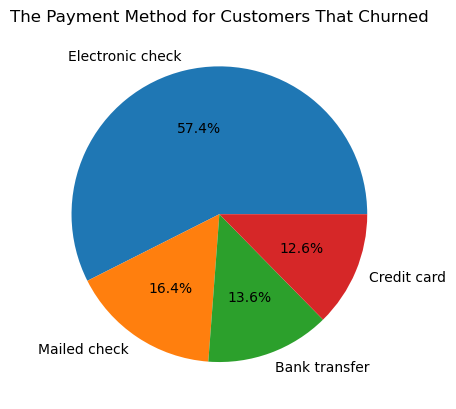

In [75]:
#created a pie chart with the methods and the percentage of each Payment Method
fig, ax = plt.subplots()
plot = ax.pie(yes_churn_pm['PaymentMethod'], labels=yes_churn_pm['index'], autopct='%1.1f%%')
plt.title('The Payment Method for Customers That Churned')

##### No Churn

In [76]:
#using the no_churn df created a split for the unique payment methods
no_churn_pm = pd.DataFrame(no_churn['PaymentMethod'].value_counts()).reset_index()
no_churn_pm

,index,PaymentMethod
0,Mailed check,1213
1,Credit card,1203
2,Electronic check,1197
3,Bank transfer,1189


Text(0.5, 1.0, 'The Payment Method for Customers with No Churn')

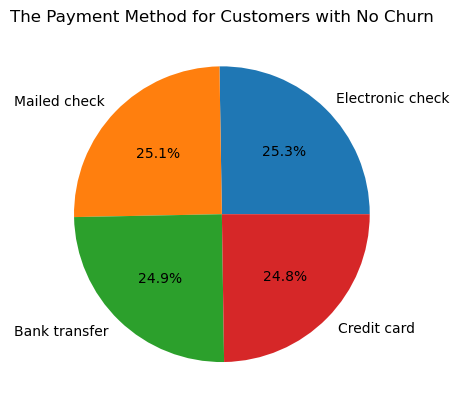

In [77]:
#created a pie chart with the methods and the percentage of each Payment Method of customers that did not churn
fig, ax = plt.subplots()
plot = ax.pie(no_churn_pm['PaymentMethod'], labels=yes_churn_pm['index'], autopct='%1.1f%%')
plt.title('The Payment Method for Customers with No Churn')

##### Automatic payment methods churn rate (bank transfer or credit card) 

In [78]:
#Determine the percentage of Automatic payment methods that churn compared to the overall customer base. 
#Create a subset with only Automatic payment methods
auto = bpp_df.query("PaymentMethod == 'Credit card' or PaymentMethod == 'Bank transfer'")
auto

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer,70.40,2406.10,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card,95.65,4664.20,No
8,6407-GSJNL,Female,0,No,No,51,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Bank transfer,24.95,1288.00,No
10,4049-ZPALD,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer,99.00,6375.80,No
12,3733-UOCWF,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer,85.55,5251.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,2162-FRZAA,Male,0,Yes,Yes,63,No,No phone service,DSL,No,...,Yes,Yes,No,No,Two year,No,Bank transfer,39.35,2395.05,No
4894,5118-MUEYH,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card,105.10,5083.55,No
4895,9095-HFAFX,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card,81.00,389.60,Yes
4896,5627-TVBPP,Female,0,No,Yes,35,Yes,No,No,No,...,No,No,No,No,One year,Yes,Credit card,20.10,644.50,No


In [79]:
#Create a dataframe with the customers with Automatic payment methods data 
auto_df = pd.DataFrame(auto['Churn'].value_counts())
#Calculate the churn rate
auto_df['churn_rate'] = ((auto_df['Churn']/2848)*100).round(2)
auto_df

,Churn,churn_rate
No,2392,83.99
Yes,456,16.01


##### Non-automatic methods (electronic check or mailed check)

In [80]:
#Determine the percentage of Automatic payment methods that churn compared to the overall customer base. 
#Create a subset with only Automatic payment methods
non_auto = bpp_df.query("PaymentMethod == 'Electronic check' or PaymentMethod == 'Mailed check'")
non_auto

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.45,638.55,No
2,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.35,191.10,No
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
5,4097-YODCF,Male,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,103.80,3470.80,No
6,9715-WZCLW,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20,6910.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
4891,8124-NZVGJ,Female,0,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,49.25,255.60,No
4893,5376-DEQCP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.60,70.60,Yes
4897,2379-ENZGV,Male,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,523.50,Yes


In [81]:
#Create a dataframe with the customers with Automatic payment methods data 
non_auto_df = pd.DataFrame(non_auto['Churn'].value_counts())
#Calculate the churn rate
non_auto_df['churn_rate'] = ((non_auto_df['Churn']/3695 )*100).round(2)
non_auto_df

,Churn,churn_rate
No,2410,65.22
Yes,1285,34.78


The churn rate of customers using non automatic methods is higher (34.78%) than those using automatic methods (16.01%). The split of methods for customers that do not churn is quite even across all four methods and for customers that do churn most (57.4%) use Electronic checking as a method of payment.

#### 7. Correlation Matrix

In [82]:
# Create correlation matrix to identify columns to predict whether customer will churn or not
correlation = encoded_df.corr()
correlation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.007034,0.007511,-0.021675,-0.016207,0.005902,0.000684,0.006901,-0.012445,0.015870,...,-0.000500,0.003716,-0.003851,-0.012697,0.012227,0.000837,0.014569,-0.003433,0.004896,-0.012053
gender,0.007034,1.000000,-0.000590,0.001197,0.012428,0.003138,-0.006774,-0.011482,0.000895,-0.012099,...,-0.006935,-0.012820,-0.008440,-0.014444,-0.004482,-0.008424,0.015505,-0.017401,-0.002287,-0.009368
SeniorCitizen,0.007511,-0.000590,1.000000,0.014977,-0.212211,0.020751,0.014646,0.152554,-0.027738,-0.041627,...,0.062055,-0.061841,0.108386,0.121279,-0.137559,0.159795,-0.041364,0.225972,0.112646,0.154508
Partner,-0.021675,0.001197,0.014977,1.000000,0.452628,0.382913,0.018511,0.144255,0.000881,0.144710,...,0.153139,0.116842,0.123452,0.119384,0.300261,-0.015587,-0.157933,0.108116,0.342777,-0.152146
Dependents,-0.016207,0.012428,-0.212211,0.452628,1.000000,0.160250,-0.005392,-0.026564,0.046138,0.077354,...,0.010377,0.062408,-0.023955,-0.045402,0.243263,-0.111236,-0.047362,-0.113707,0.075318,-0.163934
tenure,0.005902,0.003138,0.020751,0.382913,0.160250,1.000000,0.009925,0.339851,-0.033714,0.333038,...,0.362667,0.326040,0.280779,0.287670,0.671188,0.002967,-0.371852,0.272240,0.872964,-0.350133
PhoneService,0.000684,-0.006774,0.014646,0.018511,-0.005392,0.009925,1.000000,-0.019395,0.385753,-0.089816,...,-0.069177,-0.097640,-0.021756,-0.031282,0.004983,0.017801,-0.007264,0.269538,0.086066,0.013907
MultipleLines,0.006901,-0.011482,0.152554,0.144255,-0.026564,0.339851,-0.019395,1.000000,-0.112660,0.133905,...,0.230241,0.133529,0.272825,0.277770,0.106411,0.163401,-0.174946,0.445828,0.460347,0.042431
InternetService,-0.012445,0.000895,-0.027738,0.000881,0.046138,-0.033714,0.385753,-0.112660,1.000000,-0.393604,...,-0.309538,-0.392142,-0.243962,-0.249555,0.098327,-0.141182,0.085662,-0.248315,-0.213206,-0.047462
OnlineSecurity,0.015870,-0.012099,-0.041627,0.144710,0.077354,0.333038,-0.089816,0.133905,-0.393604,1.000000,...,0.282145,0.358613,0.175859,0.189495,0.250640,-0.004538,-0.155367,0.282906,0.414568,-0.171444


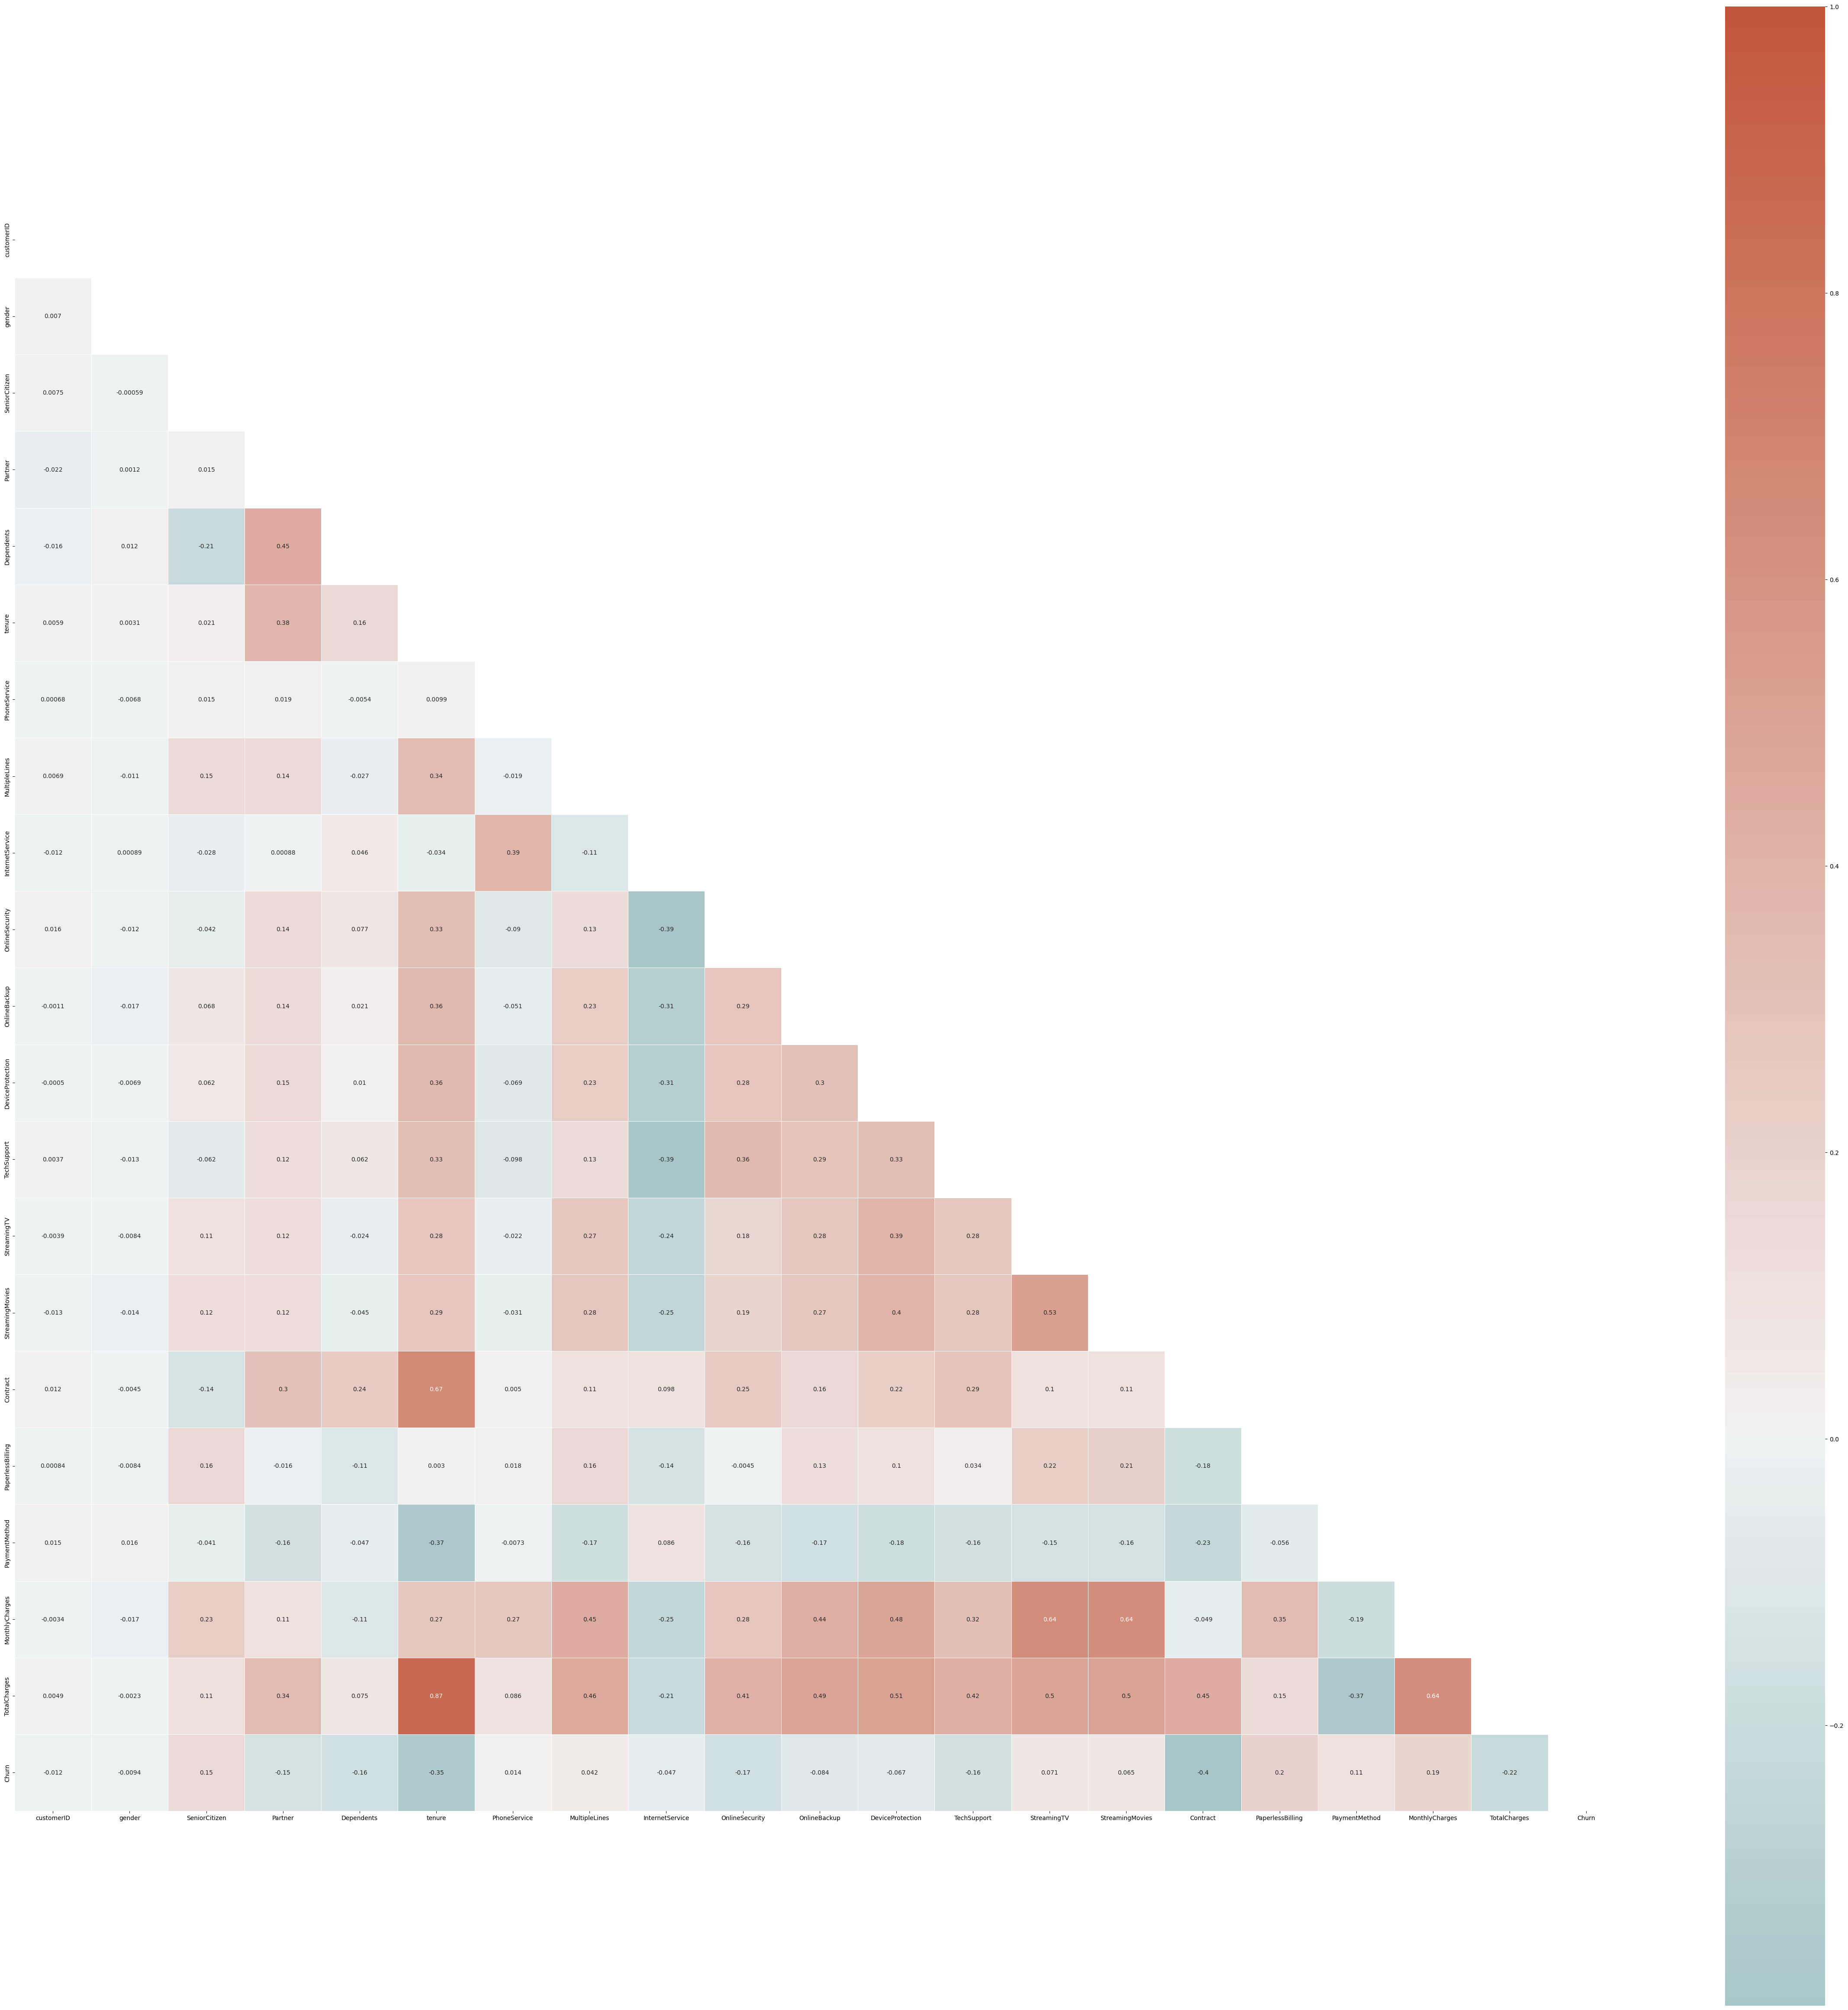

In [83]:
# Display correlation matrix
# Set the masked sections of the chart to prevent duplicating data
mask = np.triu(np.ones_like(correlation, dtype=bool))
#Set the colour range
cmap = sns.diverging_palette(200, 20, as_cmap=True)
# Plot the chart 
f, ax = plt.subplots(figsize=(60,60))
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True);

Correlation matrix displays correlation coefficients between variables, with 1 being a strong positive relationship, -1 a strong negative relationship and 0 no relationship (Bock, 2022).

#### 8. Ethical Concerns

The Equality Act 2010 protects people from discrimination in the workplace and in wider society. When building predictive models, we must ensure that we do not introduce bias to models that could lead to discrimination, (UK Gov, 2010).
In this dataset, we have gender, age and marriage and civil partnership, which are all protected characteristic. However, only Gender was specifically identifiable. As the basis for this model is to understand the customer Gender can be removed from the dataset to prevent discrimination and breach of the Equality Act.


In [84]:
#Drop the columns that have little relationship with Churn and Gender due to ethical concerns
cleaned_df = encoded_df.drop(['customerID', 'gender', 'PhoneService', 'InternetService' ], axis=1)

# 4. Modelling

#### Correlation Matrix

In [85]:
#Create correlation matrix to identify columns to predict whether customer will churn or not
correlation = cleaned_df.corr()
correlation

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.014977,-0.212211,0.020751,0.152554,-0.041627,0.067629,0.062055,-0.061841,0.108386,0.121279,-0.137559,0.159795,-0.041364,0.225972,0.112646,0.154508
Partner,0.014977,1.000000,0.452628,0.382913,0.144255,0.144710,0.142897,0.153139,0.116842,0.123452,0.119384,0.300261,-0.015587,-0.157933,0.108116,0.342777,-0.152146
Dependents,-0.212211,0.452628,1.000000,0.160250,-0.026564,0.077354,0.021080,0.010377,0.062408,-0.023955,-0.045402,0.243263,-0.111236,-0.047362,-0.113707,0.075318,-0.163934
tenure,0.020751,0.382913,0.160250,1.000000,0.339851,0.333038,0.363775,0.362667,0.326040,0.280779,0.287670,0.671188,0.002967,-0.371852,0.272240,0.872964,-0.350133
MultipleLines,0.152554,0.144255,-0.026564,0.339851,1.000000,0.133905,0.228279,0.230241,0.133529,0.272825,0.277770,0.106411,0.163401,-0.174946,0.445828,0.460347,0.042431
OnlineSecurity,-0.041627,0.144710,0.077354,0.333038,0.133905,1.000000,0.290414,0.282145,0.358613,0.175859,0.189495,0.250640,-0.004538,-0.155367,0.282906,0.414568,-0.171444
OnlineBackup,0.067629,0.142897,0.021080,0.363775,0.228279,0.290414,1.000000,0.302771,0.293165,0.278611,0.273245,0.157862,0.125114,-0.168633,0.436512,0.493540,-0.084019
DeviceProtection,0.062055,0.153139,0.010377,0.362667,0.230241,0.282145,0.302771,1.000000,0.331693,0.391739,0.400154,0.221017,0.102491,-0.180465,0.482925,0.510515,-0.066949
TechSupport,-0.061841,0.116842,0.062408,0.326040,0.133529,0.358613,0.293165,0.331693,1.000000,0.275981,0.277009,0.292332,0.033973,-0.155989,0.324818,0.423286,-0.158951
StreamingTV,0.108386,0.123452,-0.023955,0.280779,0.272825,0.175859,0.278611,0.391739,0.275981,1.000000,0.529589,0.102853,0.223014,-0.149103,0.641865,0.496595,0.071018


<AxesSubplot: >

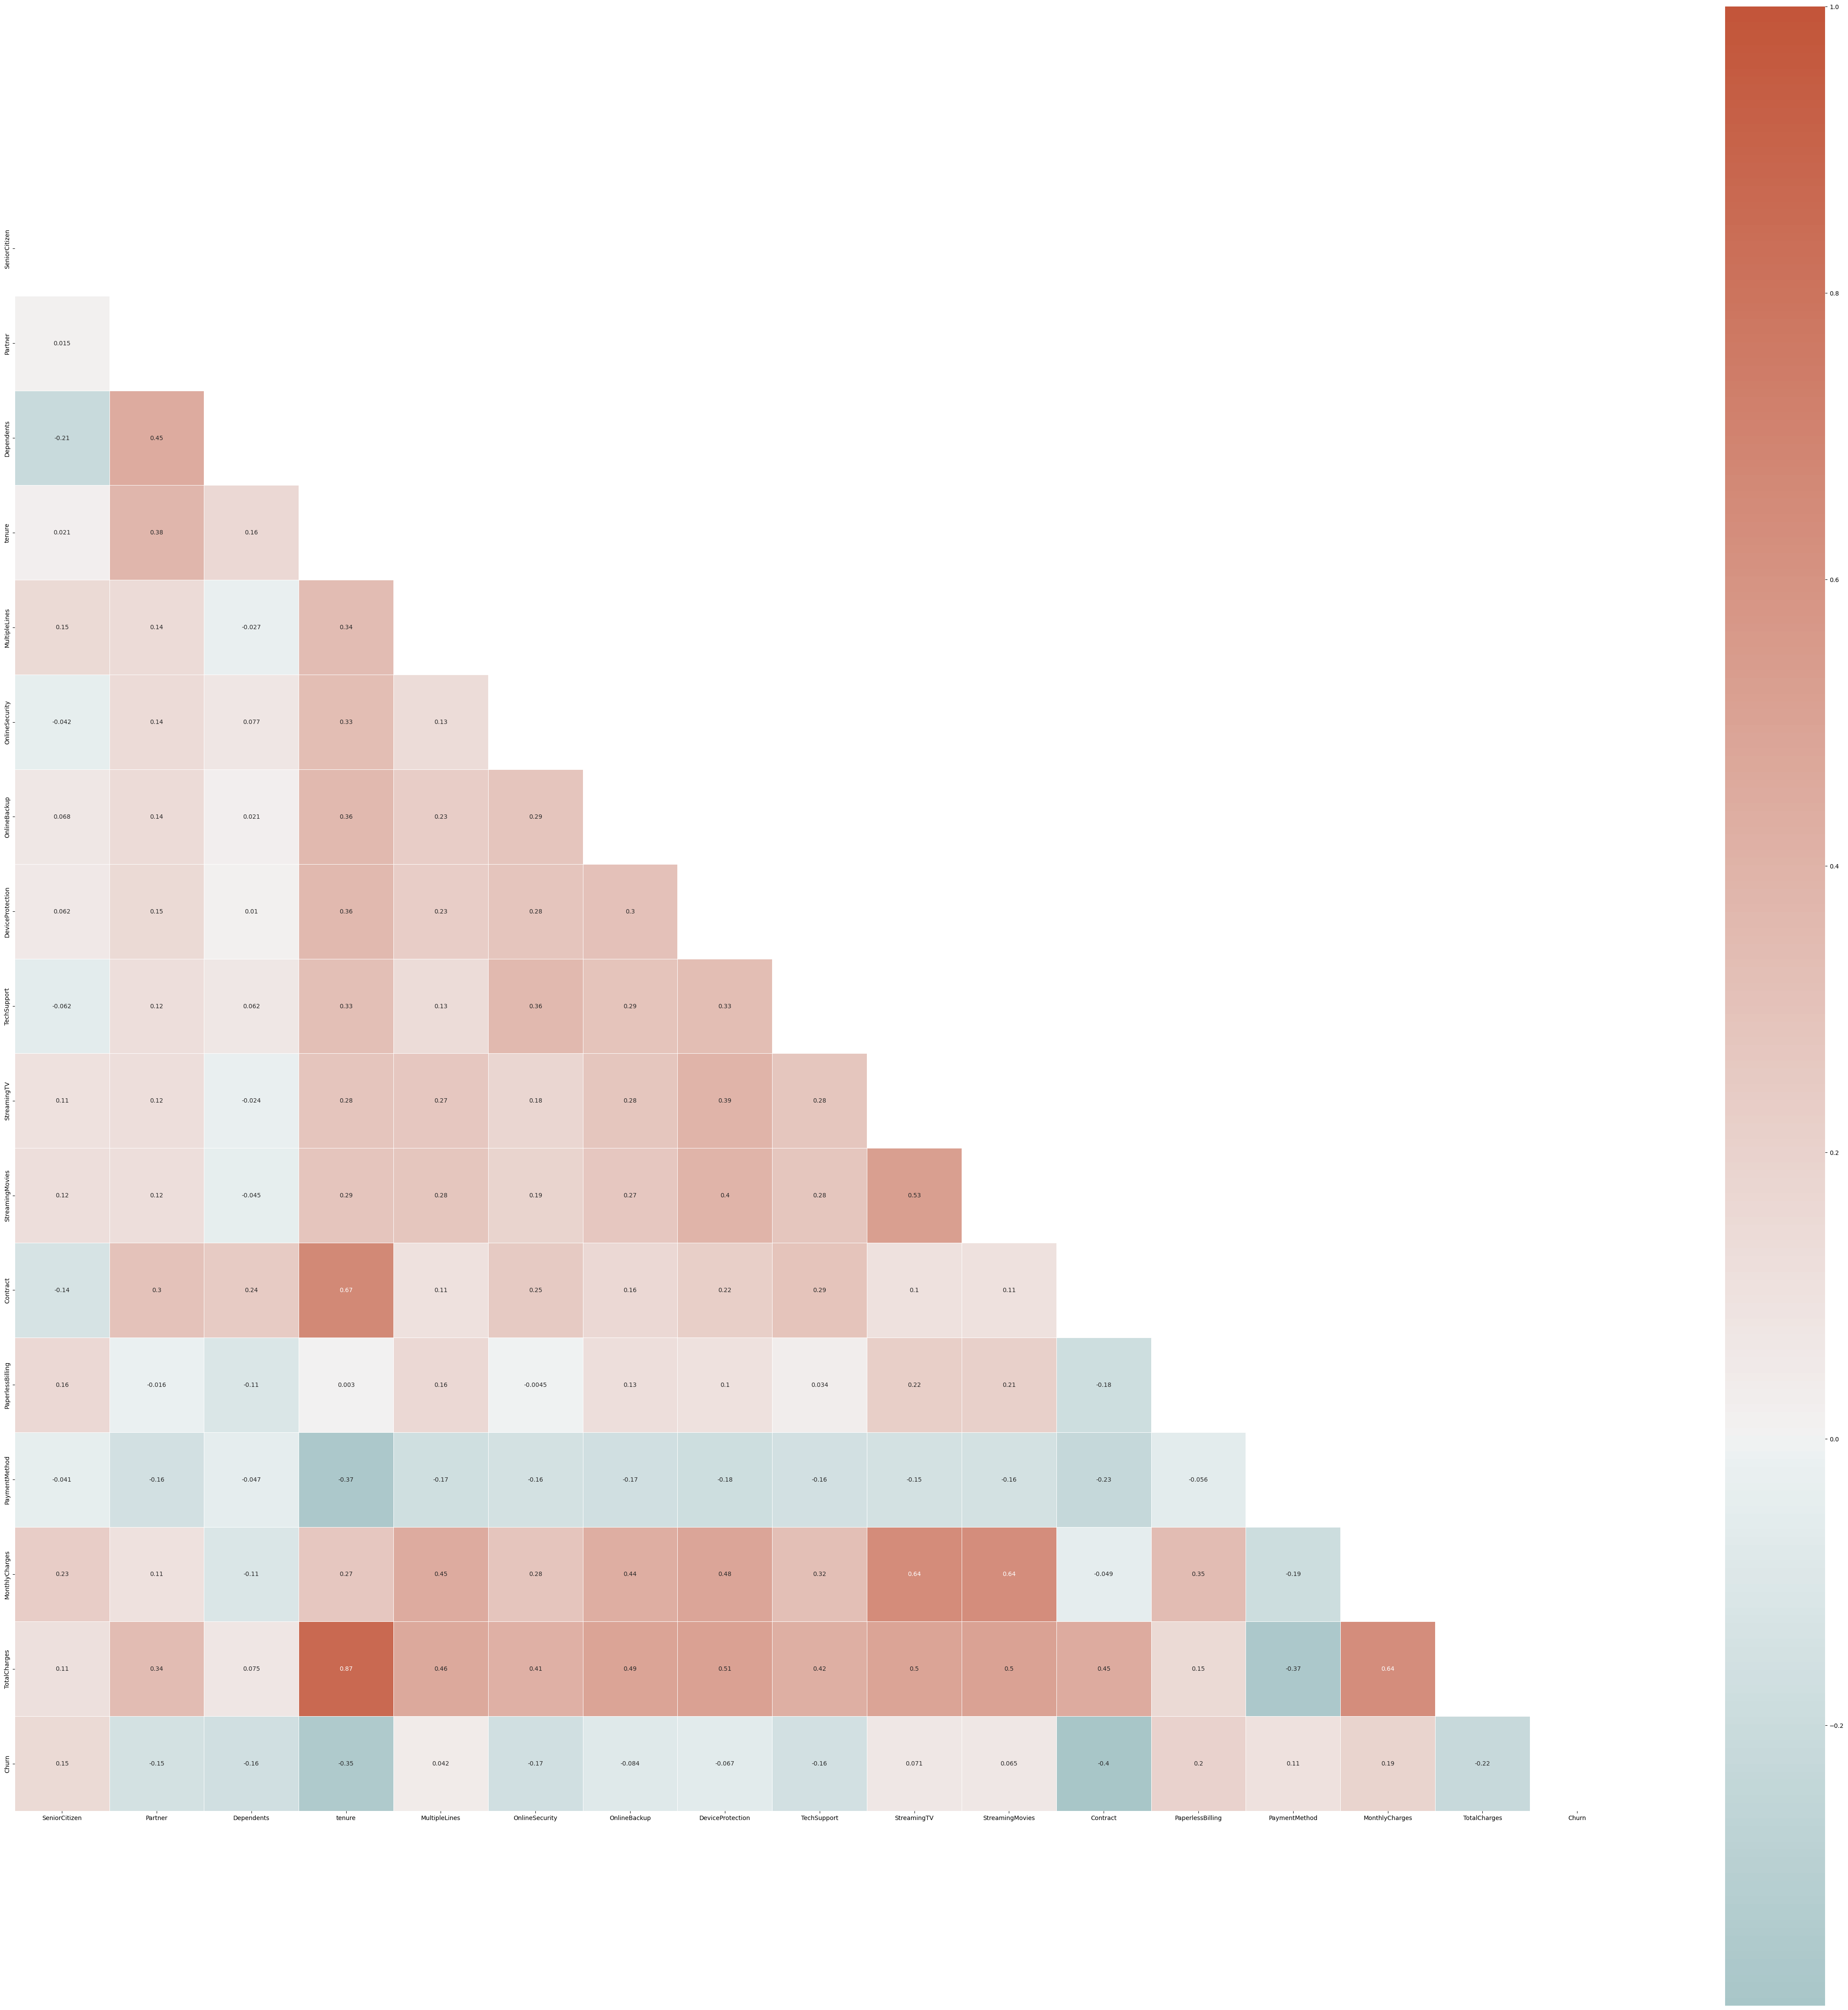

In [86]:
#Display correlation matrix
#Set the masked sections of the chart to prevent duplicating data
mask = np.triu(np.ones_like(correlation, dtype=bool))
#Set the colour range
cmap = sns.diverging_palette(200, 20, as_cmap=True)
# Plot the chart 
f, ax = plt.subplots(figsize=(60,60))
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, annot=True)

Total charges has a high correlation with Tenure and Monthly charges and due to this colineararity we will remove Total Charges. DeviceProtection shows little correlation and so will also be dropped.

In [87]:
cleaned_df = cleaned_df.drop(['DeviceProtection', 'TotalCharges'], axis=1)

In [88]:
#create our two sets of data for modelling
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

#### Test/Train Split

In [89]:
#split the training set, did cosider a 70:30 split but as the dataset is more than 1000 rows decided on 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Number of training instances:', len(X_train))
print('Number of test instances:', len(y_test))

Number of training instances: 5234
Number of test instances: 1309


#### Decision Tree Model

As the churn model consists of several questions and then there is an outcome to churn/not to churn, a decision tree will help to understand how all the different features contribute to the final outcome.

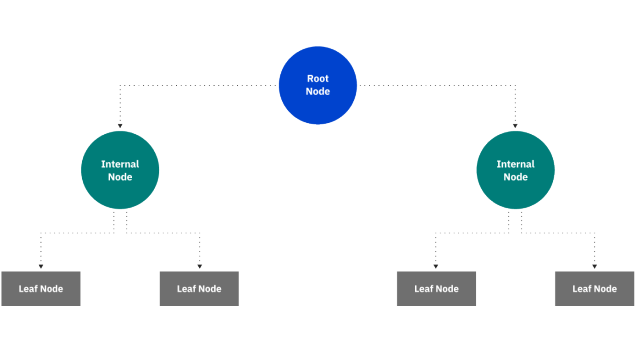

(IBM, 2023)

In [90]:
#started with a Decision Tree classifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
y_pred_dec = dectree.predict(X_test)

acc_DEC = metrics.accuracy_score(y_test, y_pred_dec)
DECmse = metrics.mean_squared_error(y_test, y_pred_dec)
DECrmse = np.sqrt(DECmse)
print('MSE:', DECmse, "RMSE:", DECrmse);
print("Decision Tree Classifier Accuracy:", acc_DEC)
print()


MSE: 0.26737967914438504 RMSE: 0.5170876899950192
Decision Tree Classifier Accuracy: 0.732620320855615



In [91]:
df_DEC = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dec})
df_DEC['Predicted'] = df_DEC['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]
df_DEC = df_DEC.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_DEC['Result'] = results
df_DEC = df_DEC[["Result","Actual","Predicted","Count"]]
df_DEC.head()

,Result,Actual,Predicted,Count
0,True Negative,0,0,783
1,False Positive,0,1,192
2,False Negative,1,0,158
3,True Positive,1,1,176


The advantages of this model were it was easy to understand however, the accuracy of the model could be improved by the use of another algorithm.

#### Logistic Regression Model

Logistic regression estimates the probability of an event occurring, such as churn or not churn, based on the variables in a dataset, which made it another model fitting for this problem (IBM,2023).

In [92]:
#wanted to see the performance of a Logistic regression model as
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
acc_LOG = metrics.accuracy_score(y_test, y_pred_log)
LOGmse = metrics.mean_squared_error(y_test, y_pred_log)
LOGrmse = np.sqrt(LOGmse)
print('MSE:', LOGmse, "RMSE:", LOGrmse);


print("Logistic Regression Accuracy:", acc_LOG)
print()

MSE: 0.18716577540106952 RMSE: 0.43262660043167656
Logistic Regression Accuracy: 0.8128342245989305



In [93]:
df_LOG = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_log})
df_LOG['Predicted'] = df_LOG['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]
df_LOG = df_LOG.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_LOG['Result'] = results
df_LOG = df_LOG[["Result","Actual","Predicted","Count"]]
df_LOG.head()

,Result,Actual,Predicted,Count
0,True Negative,0,0,881
1,False Positive,0,1,94
2,False Negative,1,0,151
3,True Positive,1,1,183


### Model Comparison Plots

In [94]:
#Number of incorrect classifications converted to strings for formatting
LOG_wrong = (df_LOG['Count'][1]+df_LOG['Count'][2]).astype(str)
DEC_wrong = (df_DEC['Count'][1]+df_DEC['Count'][2]).astype(str)

In [95]:
#Count False Positives for each model
LOG_FP = (df_LOG['Count'][1])
DEC_FP = (df_DEC['Count'][1])

#Count False Negatives for each model
LOG_FN = (df_LOG['Count'][2])
DEC_FN = (df_DEC['Count'][2])

#Count True Positives for each model
LOG_TP = (df_LOG['Count'][0])
DEC_TP = (df_DEC['Count'][0])

#Count True Negatives for each model
LOG_TP = (df_LOG['Count'][3])
DEC_TP = (df_DEC['Count'][3])


In [96]:
#Calculate precision - The quality of a positive prediction- TP/(TP+FP)
Prec_LR = LOG_TP/(LOG_TP+LOG_FP)
Prec_DEC = DEC_TP/(DEC_TP+DEC_FP)

# Calculate Recall - Proportion of positives correctly identified- TP/(TP+FN)
Rec_LR = LOG_TP/(LOG_TP+LOG_FN)
Rec_DEC = DEC_TP/(DEC_TP+DEC_FN)

#Calculate F1 score - Accuracy score that combines precision and recall- 2*(P*R)/(P+R)
F1_LR = 2 * (Prec_LR*Rec_LR)/(Prec_LR+Rec_LR)
F1_DEC = 2 * (Prec_DEC*Rec_DEC)/(Prec_DEC+Rec_DEC)

In [97]:
#Define and output summary of all models

data ={'Logistic Regression': [acc_LOG, Prec_LR, Rec_LR, F1_LR],
       'Decision Tree': [acc_DEC, Prec_DEC, Rec_DEC, F1_DEC],
       }
df_comp = pd.DataFrame(data)
df_comp = df_comp.rename(index={0 : 'Accuracy',
                                1 : 'Precision',
                                2 : 'Recall',
                                3 : 'F1'})
df_comp

,Logistic Regression,Decision Tree
Accuracy,0.812834,0.732620
Precision,0.660650,0.478261
Recall,0.547904,0.526946
F1,0.599018,0.501425


Overall across all metrics, the Logistic regression model performs stronger and so it will be the model used for this solution.

## Function to Predict Churn

In [98]:
#Define function to detect churn

#Define function
def ChurnCheck(SeniorCitizen,	Partner,	Dependents,	tenure,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod,	MonthlyCharges):


#Run model using input values
  Result = logreg.predict([[SeniorCitizen,	Partner,	Dependents,	tenure,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod,	MonthlyCharges]] )

#Print summary of input value
  print('Based on your input...')
  print('')

  print('Senior Citizen:', SeniorCitizen)
  print('Partner:', Partner)
  print('Dependents:', Dependents)
  print('Tenure:', tenure)
  print('Online Security:', OnlineSecurity)
  print('Online Backup:', OnlineBackup)
  print('Device Protection:', DeviceProtection)
  print('Tech Support:', TechSupport)
  print('Streaming TV:', StreamingTV)
  print('Streaming Movies:', StreamingMovies)
  print('Contract:', Contract)
  print('Paperless Billing:', PaperlessBilling)
  print('Payment Method:', PaymentMethod)
  print('Monthly Charges:', MonthlyCharges)
  
  print('')


#Output result: [1]= Will Churn, [0]= Won't Churn
  if Result == [1]:
    print('Will Churn:')
  else :
    print("Won't Churn")

In [99]:
ChurnCheck(0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	2,	100)

Based on your input...

Senior Citizen: 0
Partner: 0
Dependents: 0
Tenure: 1
Online Security: 1
Online Backup: 1
Device Protection: 1
Tech Support: 1
Streaming TV: 1
Streaming Movies: 1
Contract: 1
Paperless Billing: 0
Payment Method: 2
Monthly Charges: 100

Won't Churn


# 5. Findings and Recommendations

BPP Telecom can use the insights gained to reduce churn by now being able to use the model to predict the likelihood of a new customer churning. The performance of the Logistic Regression model was better as it was more accurate so, we decided to move forward with that model. The Logistic Regression model also had a significantly smaller amount of False Positives (94) compared to the Decision Tree Model (197).

Currently, the churn function uses encoded inputs to predict churn, this could be developed so, they are in their original format as an input. 

When deciding what columns to include in the model, more correlation matrixes could have been used to further understand the relationship between the remaining columns and churn.

# 6. References

* Bock, T. (2022). What is a Correlation Matrix?. [Online]. Display R. Last Updated: 20 March 2022. Available at: https://www.displayr.com/what-is-a-correlation-matrix/ [Accessed 3 September 2023].

* Equality Act. (2010). [Online]. GOV.UK. Last Updated: 27 February 2013. Available at: https://www.gov.uk/guidance/equality-act-2010-guidance [Accessed 3 September 2023].

* IBM. (2023). What is a Decision Tree?. [Online]. IBM. Available at https://www.ibm.com/topics/decision-trees. [Accessed 3 September 2023].

* IBM. (2023). What is logistic regression?. [Online]. IBM. Available at https://www.ibm.com/topics/logistic-regression. [Accessed 3 September 2023].